<a href="https://colab.research.google.com/github/RAFS20/AI-and-Finance/blob/main/Corporate_Finance_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno de: Ricardo Alonzo Fernández Salguero

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Datos trimestrales desde 2000 hasta 2024 con variaciones no lineales
data = {
    'Year': np.arange(2000, 2025),
    'Q1': [120, 135, 170, 210, 250, 300, 360, 430, 510, 600, 700, 810, 930, 1060, 1200, 1350, 1510, 1680, 1860, 2050, 2250, 2460, 2680, 2910, 3150],
    'Q2': [130, 150, 180, 220, 270, 330, 400, 480, 570, 670, 780, 900, 1030, 1170, 1320, 1480, 1650, 1830, 2020, 2220, 2430, 2650, 2880, 3120, 3370],
    'Q3': [140, 160, 190, 230, 280, 340, 410, 490, 580, 680, 790, 910, 1040, 1180, 1330, 1490, 1660, 1840, 2030, 2230, 2440, 2660, 2890, 3130, 3380],
    'Q4': [150, 170, 200, 240, 290, 350, 420, 500, 590, 690, 800, 920, 1050, 1190, 1340, 1500, 1670, 1850, 2040, 2240, 2450, 2670, 2900, 3140, 3390]
}

df = pd.DataFrame(data)

# Transformar el DataFrame para tener una entrada por trimestre
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
df_long = pd.melt(df, id_vars=['Year'], value_vars=quarters, var_name='Quarter', value_name='Value')

# Añadir número de trimestre
df_long['Quarter_Num'] = df_long['Quarter'].apply(lambda x: int(x[1]))

# Crear una columna de fecha ficticia
df_long['Date'] = df_long.apply(lambda row: pd.Timestamp(f"{row['Year']}-{(quarters.index(row['Quarter']) + 1) * 3}-01"), axis=1)

# Separar los datos en entrenamiento y prueba basados en los últimos 3 años
cutoff_date = pd.to_datetime('2022-01-01')
train = df_long[df_long['Date'] < cutoff_date]
test = df_long[df_long['Date'] >= cutoff_date]

# Crear variables para los modelos
X_train = train[['Year', 'Quarter_Num']]
y_train = train['Value']
X_test = test[['Year', 'Quarter_Num']]
y_test = test['Value']

# Inicializar los modelos
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

# Entrenar y evaluar los modelos
mae_scores = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[name] = mae
    predictions[name] = y_pred

# Seleccionar el mejor modelo
best_model_name = min(mae_scores, key=mae_scores.get)
best_model = models[best_model_name]

# Predecir los flujos de efectivo para todos los trimestres de 2025
X_future = pd.DataFrame({'Year': [2025] * 4, 'Quarter_Num': [1, 2, 3, 4]})
predictions_2025 = best_model.predict(X_future)

# Imprimir resultados de todos los modelos
for name, mae in mae_scores.items():
    print(f"Modelo: {name} con MAE: {mae:.2f}")

# Imprimir resultados del mejor modelo para 2025
print(f"\nMejor modelo: {best_model_name}")
for quarter, prediction in zip(['Q1', 'Q2', 'Q3', 'Q4'], predictions_2025):
    print(f"Predicción para {quarter} de 2025: {prediction:.2f}")

Modelo: Linear Regression con MAE: 581.82
Modelo: K-Nearest Neighbors con MAE: 532.33
Modelo: Random Forest con MAE: 476.03
Modelo: Gradient Boosting con MAE: 468.82
Modelo: Support Vector Regression con MAE: 2273.33

Mejor modelo: Gradient Boosting
Predicción para Q1 de 2025: 2459.84
Predicción para Q2 de 2025: 2649.48
Predicción para Q3 de 2025: 2659.63
Predicción para Q4 de 2025: 2669.13


In [ ]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 37.0 MB/s eta 0:00:00


In [ ]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value

# Datos
productos = ['A', 'B', 'C']
costos_pedido = {'A': 100, 'B': 150, 'C': 200}
costos_almacenamiento = {'A': 2, 'B': 1.5, 'C': 3}
demanda = {'A': 500, 'B': 300, 'C': 200}

# Definir el problema de optimización
modelo = LpProblem("Minimizar_Costos_Inventario", LpMinimize)

# Variables de decisión
cantidades_pedido = LpVariable.dicts("Cantidad_Pedido", productos, lowBound=0, cat='Integer')

# Función objetivo
modelo += lpSum(costos_pedido[i] * cantidades_pedido[i] + costos_almacenamiento[i] * cantidades_pedido[i] for i in productos)

# Restricciones
for i in productos:
    modelo += cantidades_pedido[i] >= demanda[i]

# Resolver el problema
modelo.solve()

# Resultados
for v in modelo.variables():
    print(f"{v.name} = {v.varValue}")

print(f"Coste Total = {value(modelo.objective)}")



Cantidad_Pedido_A = 500.0
Cantidad_Pedido_B = 300.0
Cantidad_Pedido_C = 200.0
Coste Total = 137050.0


Predicción de días hasta el cobro para el próximo periodo: 57.25


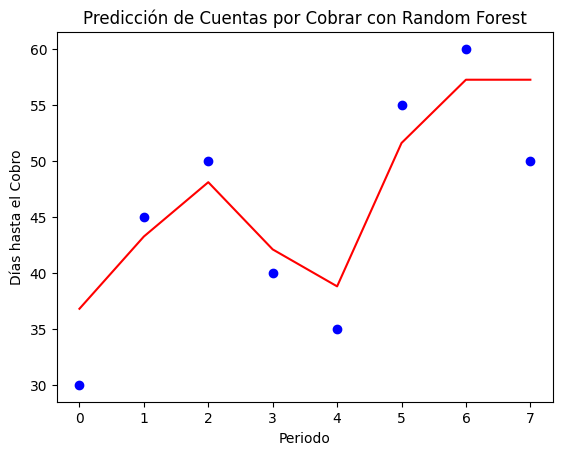

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Datos históricos de cuentas por cobrar (días hasta el cobro)
data = {
    'Periodo': ['Ene-2023', 'Feb-2023', 'Mar-2023', 'Abr-2023', 'May-2023', 'Jun-2023', 'Jul-2023', 'Ago-2023'],
    'Dias_Cobro': [30, 45, 50, 40, 35, 55, 60, 50]
}

df = pd.DataFrame(data)

# Transformar los periodos en valores numéricos
df['Periodo_Num'] = np.arange(len(df))

# Crear variables de entrenamiento y prueba
X = df[['Periodo_Num']]
y = df['Dias_Cobro']

# Dividir los datos en entrenamiento y prueba
X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1:]
y_test = y[-1:]

# Inicializar y entrenar el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Resultados
print(f"Predicción de días hasta el cobro para el próximo periodo: {y_pred[0]}")

# Visualización
plt.scatter(df['Periodo_Num'], df['Dias_Cobro'], color='blue')
plt.plot(df['Periodo_Num'], model.predict(X), color='red')
plt.xlabel('Periodo')
plt.ylabel('Días hasta el Cobro')
plt.title('Predicción de Cuentas por Cobrar con Random Forest')
plt.show()

In [ ]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, value

# Datos
proveedores = ['Proveedor1', 'Proveedor2', 'Proveedor3']
costos_pago = {'Proveedor1': 1000, 'Proveedor2': 1200, 'Proveedor3': 1500}
dias_credito = {'Proveedor1': 30, 'Proveedor2': 45, 'Proveedor3': 60}
tasa_interes = 0.05  # 5% anual

# Definir el problema de optimización
modelo = LpProblem("Minimizar_Costos_Pago", LpMinimize)

# Variables de decisión: días hasta el pago
dias_hasta_pago = LpVariable.dicts("Dias_Hasta_Pago", proveedores, lowBound=0, upBound=60, cat='Integer')

# Función objetivo
modelo += lpSum(costos_pago[i] * (1 + tasa_interes / 365 * dias_hasta_pago[i]) for i in proveedores)

# Restricciones: no pagar antes del plazo de crédito
for i in proveedores:
    modelo += dias_hasta_pago[i] >= dias_credito[i]

# Resolver el problema
modelo.solve()

# Resultados
for v in modelo.variables():
    print(f"{v.name} = {v.varValue}")

print(f"Coste Total = {value(modelo.objective)}")

Dias_Hasta_Pago_Proveedor1 = 30.0
Dias_Hasta_Pago_Proveedor2 = 45.0
Dias_Hasta_Pago_Proveedor3 = 60.0
Coste Total = 3723.8356164383567


In [ ]:
import numpy as np

# Datos ficticios históricos de 10 años
ingresos_historicos = [100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000]
costos_directos_historicos = [50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000]
costos_indirectos_historicos = [10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]
gastos_administrativos_historicos = [5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500]
gastos_comercializacion_historicos = [2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800]

# Calcular los flujos de caja históricos
flujos_caja_historicos = []
for i in range(10):
    ingresos = ingresos_historicos[i]
    costos_directos = costos_directos_historicos[i]
    costos_indirectos = costos_indirectos_historicos[i]
    gastos_administrativos = gastos_administrativos_historicos[i]
    gastos_comercializacion = gastos_comercializacion_historicos[i]
    utilidad_antes_impuestos = ingresos - costos_directos - costos_indirectos - gastos_administrativos - gastos_comercializacion
    impuestos = utilidad_antes_impuestos * 0.25  # Impuesto IUE del 25%
    flujo_caja = utilidad_antes_impuestos - impuestos
    flujos_caja_historicos.append(flujo_caja)

# Calcular el valor presente de los flujos de caja futuros
tasa_descuento = 0.1  # Tasa de descuento estándar del 10%
valor_presente = 0
for i in range(5):  # Proyectando flujos de caja para los próximos 5 años con un crecimiento estándar del 5%
    flujo_caja_futuro = flujos_caja_historicos[-1] * 1.05 ** (i + 1)
    valor_presente += flujo_caja_futuro / (1 + tasa_descuento) ** (i + 1)

# Valor terminal
tasa_crecimiento_perpetuo = 0.03  # Tasa de crecimiento perpetuo del 3%
valor_terminal = flujos_caja_historicos[-1] * 1.05 ** 6 / (tasa_descuento - tasa_crecimiento_perpetuo)
valor_presente += valor_terminal / (1 + tasa_descuento) ** 5

print(f"Valor de la empresa (valoración tradicional): {valor_presente:.2f}")

Valor de la empresa (valoración tradicional): 763929.47


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Crear un DataFrame con los datos históricos
datos = pd.DataFrame({
    'ingresos': ingresos_historicos,
    'costos_directos': costos_directos_historicos,
    'costos_indirectos': costos_indirectos_historicos,
    'gastos_administrativos': gastos_administrativos_historicos,
    'gastos_comercializacion': gastos_comercializacion_historicos
})

# Crear un modelo de Random Forest para predecir los ingresos futuros
X = datos.drop('ingresos', axis=1)
X.columns = ['costos_directos', 'costos_indirectos', 'gastos_administrativos', 'gastos_comercializacion']
y = datos['ingresos']
rf_ingresos = RandomForestRegressor()
rf_ingresos.fit(X, y)

# Predecir los ingresos futuros para los próximos 5 años
ingresos_futuros = []
for i in range(5):
    # Convertir el último registro en un DataFrame con nombres de columnas
    ultima_fila = X.iloc[-1].values.reshape(1, -1)
    ultima_fila_df = pd.DataFrame(ultima_fila, columns=X.columns)
    ingresos_futuros.append(rf_ingresos.predict(ultima_fila_df)[0])

    # Actualizar X e y con las nuevas predicciones
    X = pd.concat([X, ultima_fila_df], ignore_index=True)
    y = pd.concat([y, pd.Series(ingresos_futuros[-1])], ignore_index=True)
    rf_ingresos.fit(X, y)

# Calcular los flujos de caja futuros utilizando las predicciones de ingresos
flujos_caja_futuros = []
for i in range(5):
    ingresos = ingresos_futuros[i]
    costos_directos = costos_directos_historicos[-1] * 1.05 ** (i + 1)
    costos_indirectos = costos_indirectos_historicos[-1] * 1.05 ** (i + 1)
    gastos_administrativos = gastos_administrativos_historicos[-1] * 1.05 ** (i + 1)
    gastos_comercializacion = gastos_comercializacion_historicos[-1] * 1.05 ** (i + 1)
    utilidad_antes_impuestos = ingresos - costos_directos - costos_indirectos - gastos_administrativos - gastos_comercializacion
    impuestos = utilidad_antes_impuestos * 0.25
    flujo_caja = utilidad_antes_impuestos - impuestos
    flujos_caja_futuros.append(flujo_caja)

# Calcular el valor presente de los flujos de caja futuros
valor_presente_ml = 0
for i in range(5):
    valor_presente_ml += flujos_caja_futuros[i] / (1 + tasa_descuento) ** (i + 1)

# Valor terminal
tasa_crecimiento_perpetuo = 0.03
valor_terminal_ml = flujos_caja_futuros[-1] / (tasa_descuento - tasa_crecimiento_perpetuo)
valor_presente_ml += valor_terminal_ml / (1 + tasa_descuento) ** 5

print(f"Valor de la empresa (incorporando ML): {valor_presente_ml:.2f}")

Valor de la empresa (incorporando ML): 275621.53


Utilidad Neta Promedio en 5 años: $905,966.45
Intervalo de Confianza al 90%: $779,082.62 - $1,033,211.82


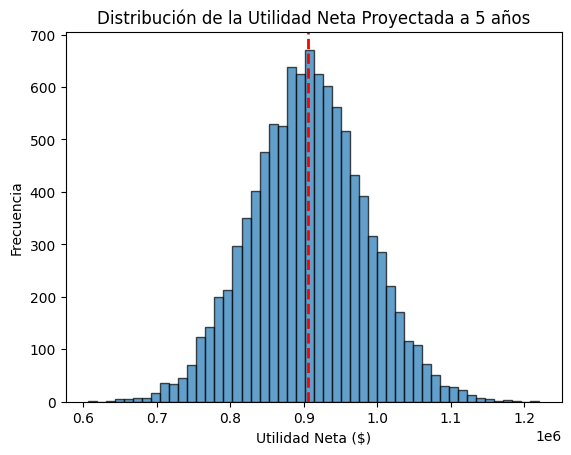

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos iniciales
ingresos_iniciales = 500000
costos_iniciales = 300000
gastos_generales = 50000
tasa_impuesto = 0.25
horizonte = 5
simulaciones = 10000

# Resultados de las simulaciones
resultados_utilidad_neta = []

for _ in range(simulaciones):
    ingresos = ingresos_iniciales
    costos = costos_iniciales
    utilidad_neta = 0

    for _ in range(horizonte):
        crecimiento_ingresos = np.random.normal(0.10, 0.02)
        incremento_costos = np.random.normal(0.08, 0.015)
        ingresos *= (1 + crecimiento_ingresos)
        costos *= (1 + incremento_costos)
        utilidad_bruta = ingresos - costos
        utilidad_operativa = utilidad_bruta - gastos_generales
        utilidad_neta_anual = utilidad_operativa * (1 - tasa_impuesto)
        utilidad_neta += utilidad_neta_anual

    resultados_utilidad_neta.append(utilidad_neta)

# Análisis de Resultados
utilidad_neta_promedio = np.mean(resultados_utilidad_neta)
intervalo_confianza = np.percentile(resultados_utilidad_neta, [5, 95])

print(f'Utilidad Neta Promedio en 5 años: ${utilidad_neta_promedio:,.2f}')
print(f'Intervalo de Confianza al 90%: ${intervalo_confianza[0]:,.2f} - ${intervalo_confianza[1]:,.2f}')

# Gráfico de Resultados
plt.hist(resultados_utilidad_neta, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(utilidad_neta_promedio, color='r', linestyle='dashed', linewidth=2)
plt.title('Distribución de la Utilidad Neta Proyectada a 5 años')
plt.xlabel('Utilidad Neta ($)')
plt.ylabel('Frecuencia')
plt.show()


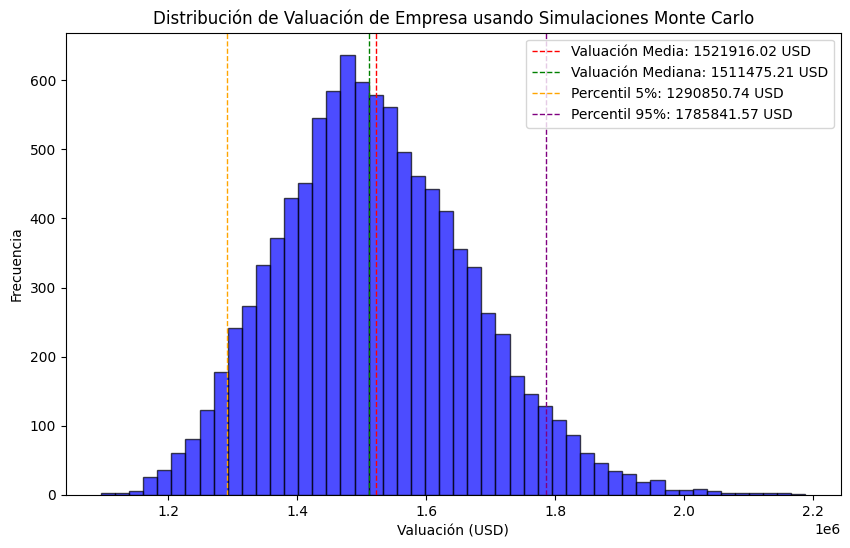

Valuación Media: 1521916.02 USD
Valuación Mediana: 1511475.21 USD
Percentil 5%: 1290850.74 USD
Percentil 95%: 1785841.57 USD


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar nuevamente distribuciones de las variables de entrada para reproducir el ejemplo
np.random.seed(42)
n_simulations = 10000
growth_rate_sales = np.random.normal(0.10, 0.02, n_simulations)
growth_rate_costs = np.random.normal(0.05, 0.01, n_simulations)
wacc = np.random.normal(0.12, 0.01, n_simulations)

# Inicializar arrays para almacenar resultados de FCF y valuación
fcf = np.zeros(n_simulations)
valuation = np.zeros(n_simulations)

# Datos iniciales
sales_2023 = 700000
costs_2023 = 380000
capex = 50000
depreciation = 30000
tax_rate = 0.25
working_capital_ratio = 0.10

# Simulaciones Monte Carlo
for i in range(n_simulations):
    sales = sales_2023 * (1 + growth_rate_sales[i])
    costs = costs_2023 * (1 + growth_rate_costs[i])
    ebit = sales - costs
    taxes = ebit * tax_rate
    nopat = ebit - taxes
    change_in_working_capital = sales * working_capital_ratio
    fcf[i] = nopat + depreciation - capex - change_in_working_capital
    valuation[i] = fcf[i] / wacc[i]

# Calcular estadísticas descriptivas
mean_valuation = np.mean(valuation)
median_valuation = np.median(valuation)
percentile_5 = np.percentile(valuation, 5)
percentile_95 = np.percentile(valuation, 95)

# Crear el histograma de las valuaciones
plt.figure(figsize=(10,6))
plt.hist(valuation, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Valuación de Empresa usando Simulaciones Monte Carlo')
plt.xlabel('Valuación (USD)')
plt.ylabel('Frecuencia')
plt.axvline(mean_valuation, color='red', linestyle='dashed', linewidth=1, label=f'Valuación Media: {mean_valuation:.2f} USD')
plt.axvline(median_valuation, color='green', linestyle='dashed', linewidth=1, label=f'Valuación Mediana: {median_valuation:.2f} USD')
plt.axvline(percentile_5, color='orange', linestyle='dashed', linewidth=1, label=f'Percentil 5%: {percentile_5:.2f} USD')
plt.axvline(percentile_95, color='purple', linestyle='dashed', linewidth=1, label=f'Percentil 95%: {percentile_95:.2f} USD')
plt.legend()

# Mostrar la gráfica
plt.show()

# Mostrar resultados
print(f"Valuación Media: {mean_valuation:.2f} USD")
print(f"Valuación Mediana: {median_valuation:.2f} USD")
print(f"Percentil 5%: {percentile_5:.2f} USD")
print(f"Percentil 95%: {percentile_95:.2f} USD")

    Año  Ventas  Costos  Inversión en Marketing  Empleados     IVA     IT  \
0  2024   10000    6500                     500         20  1300.0  300.0   
1  2025   10500    6700                     525         22  1365.0  315.0   
2  2026   11000    7000                     550         24  1430.0  330.0   
3  2027   11500    7200                     575         25  1495.0  345.0   
4  2028   12000    7500                     600         26  1560.0  360.0   

   Utilidad Bruta     IUE  Utilidad Neta  Free Cash Flow  
0            3000  750.00        2250.00         3250.00  
1            3275  818.75        2456.25         3506.25  
2            3450  862.50        2587.50         3687.50  
3            3725  931.25        2793.75         3943.75  
4            3900  975.00        2925.00         4125.00  

Estadísticas de Free Cash Flow por año:

Año 1:
Media: 3257.03
Mediana: 3241.04
Desviación Estándar: 427.18

Año 2:
Media: 3528.96
Mediana: 3535.45
Desviación Estándar: 474.30

Año 3

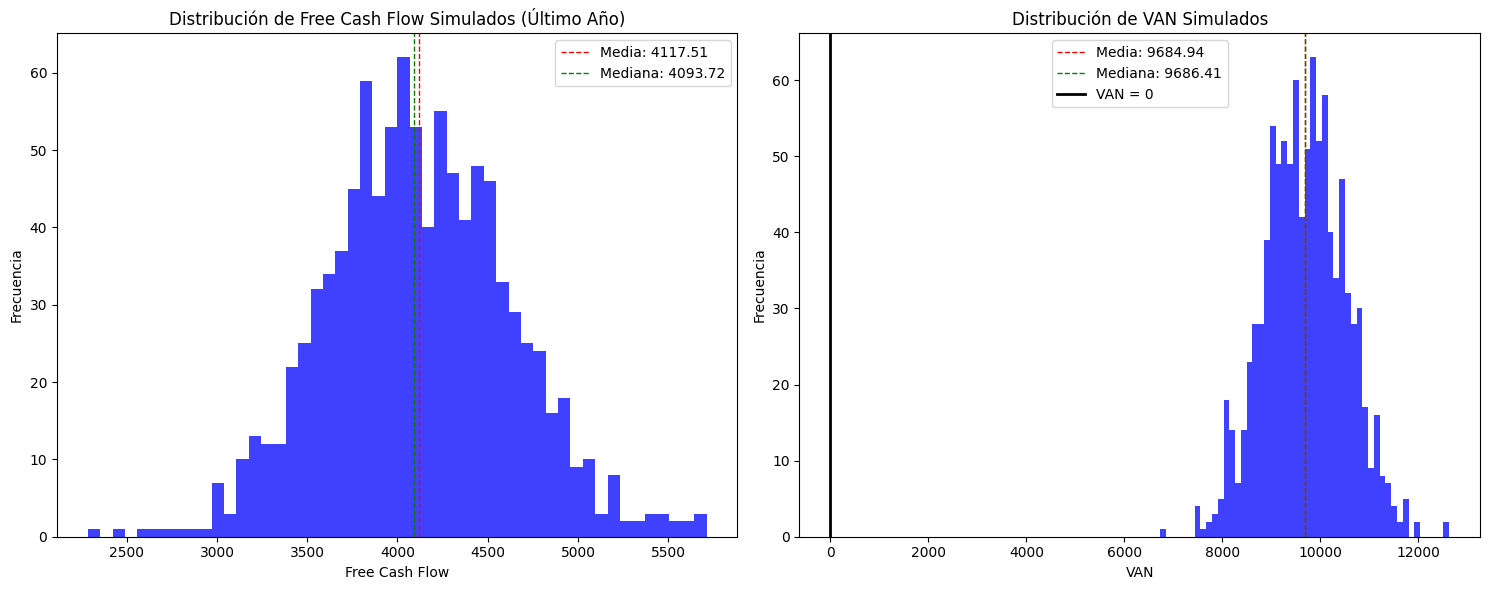

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Datos principales
data = {
    'Año': [2024, 2025, 2026, 2027, 2028],
    'Ventas': [10000, 10500, 11000, 11500, 12000],
    'Costos': [6500, 6700, 7000, 7200, 7500],
    'Inversión en Marketing': [500, 525, 550, 575, 600],
    'Empleados': [20, 22, 24, 25, 26]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Constantes según legislación boliviana
IVA = 0.13  # Impuesto al Valor Agregado
IT = 0.03   # Impuesto a las Transacciones
IUE = 0.25  # Impuesto sobre las Utilidades de las Empresas

# Cálculo de impuestos y Free Cash Flow
df['IVA'] = df['Ventas'] * IVA
df['IT'] = df['Ventas'] * IT
df['Utilidad Bruta'] = df['Ventas'] - df['Costos'] - df['Inversión en Marketing']
df['IUE'] = df['Utilidad Bruta'] * IUE
df['Utilidad Neta'] = df['Utilidad Bruta'] - df['IUE']
df['Free Cash Flow'] = df['Utilidad Neta'] + df['IVA'] - df['IT']  # Asumimos que IVA se recupera y IT se paga

# Mostrar la tabla
print(df)

# Parámetros para simulaciones Monte Carlo
n_simulaciones = 1000
tasa_descuento = 0.08
inversion_inicial = 5000
años_proyeccion = 5

# Función para simular Free Cash Flow
def simular_fcf(ventas_base, costo_base):
    ventas = norm.rvs(loc=ventas_base, scale=ventas_base*0.05)
    costo = norm.rvs(loc=costo_base, scale=costo_base*0.03)
    utilidad_bruta = ventas - costo - (ventas * 0.05)  # 5% de ventas para marketing
    iue = utilidad_bruta * IUE
    utilidad_neta = utilidad_bruta - iue
    fcf = utilidad_neta + (ventas * IVA) - (ventas * IT)
    return fcf

# Simulaciones Monte Carlo para Free Cash Flow y VAN
fcf_simulados = []
van_simulados = []

for _ in range(n_simulaciones):
    fcf_anual = []
    for año in range(años_proyeccion):
        ventas_base = df.loc[año, 'Ventas']
        costo_base = df.loc[año, 'Costos']
        fcf = simular_fcf(ventas_base, costo_base)
        fcf_anual.append(fcf)

    fcf_simulados.append(fcf_anual)

    # Cálculo del VAN
    van = -inversion_inicial
    for t, fcf in enumerate(fcf_anual, start=1):
        van += fcf / (1 + tasa_descuento)**t

    van_simulados.append(van)

# Análisis de resultados
fcf_simulados_array = np.array(fcf_simulados)
media_fcf = np.mean(fcf_simulados_array, axis=0)
mediana_fcf = np.median(fcf_simulados_array, axis=0)
std_fcf = np.std(fcf_simulados_array, axis=0)

print("\nEstadísticas de Free Cash Flow por año:")
for año in range(años_proyeccion):
    print(f"\nAño {año+1}:")
    print(f"Media: {media_fcf[año]:.2f}")
    print(f"Mediana: {mediana_fcf[año]:.2f}")
    print(f"Desviación Estándar: {std_fcf[año]:.2f}")

# Análisis del VAN
media_van = np.mean(van_simulados)
mediana_van = np.median(van_simulados)
std_van = np.std(van_simulados)
van_positivo = sum(1 for van in van_simulados if van > 0) / n_simulaciones * 100

print(f"\nEstadísticas del VAN:")
print(f"Media: {media_van:.2f}")
print(f"Mediana: {mediana_van:.2f}")
print(f"Desviación Estándar: {std_van:.2f}")
print(f"Probabilidad de VAN positivo: {van_positivo:.2f}%")

# Visualización de resultados
plt.figure(figsize=(15, 6))

# Histograma de Free Cash Flow del último año
plt.subplot(1, 2, 1)
plt.hist(fcf_simulados_array[:, -1], bins=50, alpha=0.75, color='blue')
plt.axvline(media_fcf[-1], color='r', linestyle='dashed', linewidth=1, label=f'Media: {media_fcf[-1]:.2f}')
plt.axvline(mediana_fcf[-1], color='g', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_fcf[-1]:.2f}')
plt.title('Distribución de Free Cash Flow Simulados (Último Año)')
plt.xlabel('Free Cash Flow')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma de VAN
plt.subplot(1, 2, 2)
plt.hist(van_simulados, bins=50, alpha=0.75, color='blue')
plt.axvline(media_van, color='r', linestyle='dashed', linewidth=1, label=f'Media: {media_van:.2f}')
plt.axvline(mediana_van, color='g', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_van:.2f}')
plt.axvline(0, color='black', linestyle='solid', linewidth=2, label='VAN = 0')
plt.title('Distribución de VAN Simulados')
plt.xlabel('VAN')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Definir los períodos trimestrales
periodos = pd.date_range(start='2000-01-01', end='2024-12-31', freq='Q')

# Inicializar listas para almacenar datos
data = {
    'Periodo': periodos,
    'Ingresos por Ventas': [],
    'Costo de Ventas': [],
    'Utilidad Bruta': [],
    'Gastos Administrativos': [],
    'Gastos de Ventas': [],
    'Gastos de Operación': [],
    'Utilidad Operativa': [],
    'Gastos Financieros': [],
    'Utilidad antes de Impuestos': [],
    'Impuestos': [],
    'Utilidad Neta': [],
    'Efectivo y Equivalentes': [],
    'Cuentas por Cobrar': [],
    'Inventarios': [],
    'Activos Circulantes': [],
    'Propiedades, Planta y Equipo': [],
    'Activos Intangibles': [],
    'Activos No Circulantes': [],
    'Activos Totales': [],
    'Cuentas por Pagar': [],
    'Deudas Corto Plazo': [],
    'Pasivos Circulantes': [],
    'Deudas Largo Plazo': [],
    'Pasivos No Circulantes': [],
    'Pasivos Totales': [],
    'Capital Social': [],
    'Utilidades Retenidas': [],
    'Patrimonio Neto': []
}

# Definir rangos razonables para las razones financieras
margen_utilidad_bruta = (0.2, 0.5)
margen_utilidad_operativa = (0.1, 0.3)
margen_utilidad_neta = (0.05, 0.2)
roa = (0.05, 0.15)
roe = (0.1, 0.3)
rotacion_activos = (0.5, 2.0)
liquidez_corriente = (1.5, 3.0)
liquidez_rapida = (1.0, 2.5)
razon_endeudamiento = (0.3, 0.7)
deuda_patrimonio = (0.5, 1.5)
cobertura_intereses = (2.0, 10.0)
rotacion_inventarios = (2.0, 6.0)
rotacion_cuentas_por_cobrar = (5.0, 10.0)
periodo_promedio_cobro = (30, 90)
periodo_promedio_pago = (30, 90)

# Función para generar datos del balance general con relación temporal
def generar_balance_anterior(balance_anterior, porcentaje_variacion):
    return max(balance_anterior * (1 + np.random.uniform(-porcentaje_variacion, porcentaje_variacion)), 0)

# Generar datos con relaciones coherentes y ruido
np.random.seed(42)

# Valores iniciales
ingresos_anterior = 100000
activos_totales_anterior = 500000
patrimonio_neto_anterior = activos_totales_anterior * np.random.uniform(0.3, 0.7)
pasivos_totales_anterior = activos_totales_anterior - patrimonio_neto_anterior

for i in range(len(periodos)):
    # Generar datos para el Estado de Resultados
    ingresos = generar_balance_anterior(ingresos_anterior, 0.05)
    margen_bruta = np.random.uniform(*margen_utilidad_bruta)
    utilidad_bruta = ingresos * margen_bruta
    costo_ventas = ingresos - utilidad_bruta

    margen_operativa = np.random.uniform(*margen_utilidad_operativa)
    utilidad_operativa = ingresos * margen_operativa
    gastos_operacion = max(utilidad_bruta - utilidad_operativa, 0)

    gastos_adm = gastos_operacion * np.random.uniform(0.5, 0.7)
    gastos_ventas = max(gastos_operacion - gastos_adm, 0)

    gastos_financieros = max(np.random.normal(5000, 1000), 0)
    utilidad_antes_impuestos = max(utilidad_operativa - gastos_financieros, 0)
    impuestos = utilidad_antes_impuestos * 0.25
    utilidad_neta = max(utilidad_antes_impuestos - impuestos, 0)

    # Generar datos para el Balance General
    activos_totales = generar_balance_anterior(activos_totales_anterior, 0.05)
    roa_actual = np.random.uniform(*roa)
    utilidad_neta_balance = max(activos_totales * roa_actual, 0)

    patrimonio_neto = max(utilidad_neta_balance / np.random.uniform(*roe), 0)
    pasivos_totales = max(activos_totales - patrimonio_neto, 0)

    activos_circulantes = max(activos_totales * np.random.uniform(0.4, 0.6), 0)
    activos_no_circulantes = max(activos_totales - activos_circulantes, 0)

    efectivo = max(activos_circulantes * np.random.uniform(0.1, 0.3), 0)
    cuentas_por_cobrar = max(activos_circulantes * np.random.uniform(0.2, 0.4), 0)
    inventarios = max(activos_circulantes - (efectivo + cuentas_por_cobrar), 0)

    ppe = max(activos_no_circulantes * np.random.uniform(0.7, 0.9), 0)
    activos_intangibles = max(activos_no_circulantes - ppe, 0)

    pasivos_circulantes = max(pasivos_totales * np.random.uniform(0.4, 0.6), 0)
    pasivos_no_circulantes = max(pasivos_totales - pasivos_circulantes, 0)

    cuentas_por_pagar = max(pasivos_circulantes * np.random.uniform(0.2, 0.4), 0)
    deudas_corto_plazo = max(pasivos_circulantes - cuentas_por_pagar, 0)

    deudas_largo_plazo = pasivos_no_circulantes

    capital_social = max(patrimonio_neto * np.random.uniform(0.3, 0.5), 0)
    utilidades_retenidas = max(patrimonio_neto - capital_social, 0)

    data['Ingresos por Ventas'].append(ingresos)
    data['Costo de Ventas'].append(costo_ventas)
    data['Utilidad Bruta'].append(utilidad_bruta)
    data['Gastos Administrativos'].append(gastos_adm)
    data['Gastos de Ventas'].append(gastos_ventas)
    data['Gastos de Operación'].append(gastos_operacion)
    data['Utilidad Operativa'].append(utilidad_operativa)
    data['Gastos Financieros'].append(gastos_financieros)
    data['Utilidad antes de Impuestos'].append(utilidad_antes_impuestos)
    data['Impuestos'].append(impuestos)
    data['Utilidad Neta'].append(utilidad_neta)
    data['Efectivo y Equivalentes'].append(efectivo)
    data['Cuentas por Cobrar'].append(cuentas_por_cobrar)
    data['Inventarios'].append(inventarios)
    data['Activos Circulantes'].append(activos_circulantes)
    data['Propiedades, Planta y Equipo'].append(ppe)
    data['Activos Intangibles'].append(activos_intangibles)
    data['Activos No Circulantes'].append(activos_no_circulantes)
    data['Activos Totales'].append(activos_totales)
    data['Cuentas por Pagar'].append(cuentas_por_pagar)
    data['Deudas Corto Plazo'].append(deudas_corto_plazo)
    data['Pasivos Circulantes'].append(pasivos_circulantes)
    data['Deudas Largo Plazo'].append(deudas_largo_plazo)
    data['Pasivos No Circulantes'].append(pasivos_no_circulantes)
    data['Pasivos Totales'].append(pasivos_totales)
    data['Capital Social'].append(capital_social)
    data['Utilidades Retenidas'].append(utilidades_retenidas)
    data['Patrimonio Neto'].append(patrimonio_neto)

    # Actualizar valores para el siguiente trimestre
    ingresos_anterior = ingresos
    activos_totales_anterior = activos_totales
    patrimonio_neto_anterior = patrimonio_neto
    pasivos_totales_anterior = pasivos_totales

# Crear DataFrame
df = pd.DataFrame(data)

# Guardar DataFrame en un archivo de Excel
df.to_excel('datos_financieros_trimestrales.xlsx', index=False)